Experiment 7: Compare different regression algorithms (considering suitable data and problem 
statements).

Objective

To compare multiple regression algorithms (Linear Regression, Decision Tree Regressor, Random Forest Regressor, and KNN Regressor) using a real dataset and analyze which performs best.

Problem Statement

We’ll predict house prices based on features such as area, number of rooms, etc.
For simplicity, we’ll use the Boston Housing dataset (or California Housing, since Boston is deprecated).

In [2]:
#  Regression Algorithms Comparison (House Price Prediction)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# -------------------------------------------------------
# Step 1: Load Dataset
# -------------------------------------------------------
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
print("Dataset Preview:")
display(X.head())

Dataset Preview:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# -------------------------------------------------------
# Step 2: Train-Test Split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [6]:
# -------------------------------------------------------
# Step 3: Initialize Models
# -------------------------------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

In [7]:
# -------------------------------------------------------
# Step 4: Train & Evaluate Each Model
# -------------------------------------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "RMSE": rmse, "R² Score": r2})

In [9]:
# -------------------------------------------------------
# Step 5: Compare Results
# -------------------------------------------------------
results_df = pd.DataFrame(results)
print("\nRegression Model Comparison:")
display(results_df)


Regression Model Comparison:


,Model,RMSE,R² Score
0,Linear Regression,0.728401,0.595770
1,Decision Tree,0.726643,0.597719
2,Random Forest,0.506463,0.804573
3,KNN Regressor,1.066275,0.133785


C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3060861979.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")


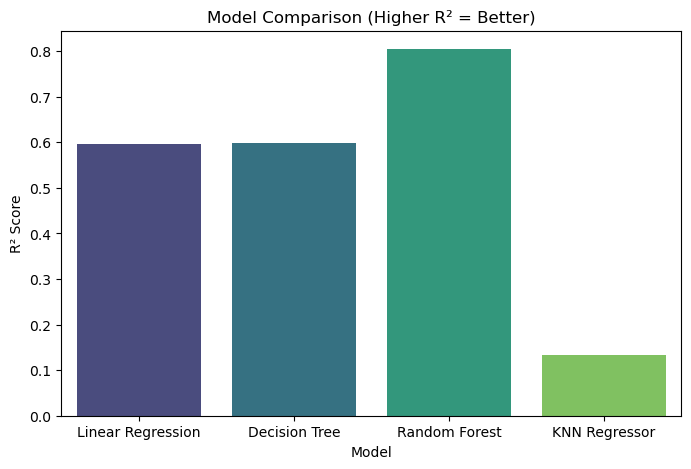

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\3060861979.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="mako")


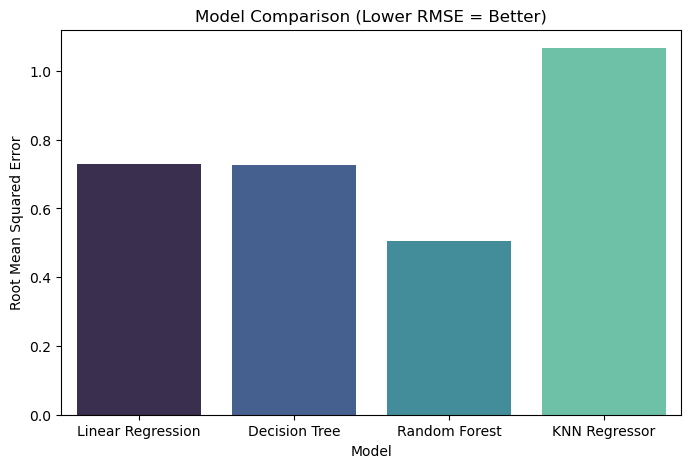

In [11]:
# -------------------------------------------------------
# Step 6: Visual Comparison
# -------------------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")
plt.title("Model Comparison (Higher R² = Better)")
plt.ylabel("R² Score")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="mako")
plt.title("Model Comparison (Lower RMSE = Better)")
plt.ylabel("Root Mean Squared Error")
plt.show()